In [120]:
!pip install fastparquet
!pip install pyarrow

     ------------------------------------- 618.3/618.3 kB 19.6 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 15.9 MB/s eta 0:00:00
     --------------------------------------- 21.5/21.5 MB 16.4 MB/s eta 0:00:00


In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as sk
from sklearn.model_selection import train_test_split
import pickle
import math
import pyarrow as pa
import pyarrow.parquet as pq
%matplotlib inline 

In [5]:
input_file = 'troop_movements.csv'
starwars_df = pd.read_csv(input_file); starwars_df.head(4)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2023-07-11 16:06:31,1,stormtrooper,empire,10,7,5,1,Eriadu
1,2023-07-11 16:06:30,2,at-at,empire,8,1,10,4,Dagobah
2,2023-07-11 16:06:29,3,resistance_soldier,resistance,3,3,7,8,Toydaria
3,2023-07-11 16:06:28,4,tie_fighter,resistance,1,1,3,7,Iridonia


In [11]:
starwars_df.empire_or_resistance[starwars_df.empire_or_resistance == 'empire'].count() , starwars_df.empire_or_resistance[starwars_df.empire_or_resistance == 'resistance'].count()

(515, 485)

In [32]:
er_counts = starwars_df.empire_or_resistance.value_counts().reset_index()
er_counts.columns = ['empire_or_resistance', 'count']
er_counts

,empire_or_resistance,count
0,empire,515
1,resistance,485


In [33]:
hw_counts = starwars_df.homeworld.value_counts().reset_index()
hw_counts.columns = ['homeworld', 'count']
hw_counts

,homeworld,count
0,Skako,40
1,Alderaan,33
2,Eriadu,31
3,Champala,29
4,Rodia,28
5,Glee Anselm,27
6,Kashyyyk,27
7,Naboo,27
8,Mon Cala,27
9,Tatooine,27


In [34]:
unit_counts = starwars_df.unit_type.value_counts().reset_index()
unit_counts.columns = ['unit_type', 'count']
unit_counts

,unit_type,count
0,stormtrooper,138
1,unknown,134
2,tie_fighter,132
3,tie_silencer,127
4,at-st,126
5,at-at,123
6,x-wing,113
7,resistance_soldier,107


In [30]:
starwars_df['is_resistance'] = starwars_df['empire_or_resistance'].apply(lambda x: True if x == "resistance" else False); starwars_df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2023-07-11 16:06:31,1,stormtrooper,empire,10,7,5,1,Eriadu,False
1,2023-07-11 16:06:30,2,at-at,empire,8,1,10,4,Dagobah,False
2,2023-07-11 16:06:29,3,resistance_soldier,resistance,3,3,7,8,Toydaria,True
3,2023-07-11 16:06:28,4,tie_fighter,resistance,1,1,3,7,Iridonia,True
4,2023-07-11 16:06:27,5,unknown,empire,2,5,7,10,Aleen Minor,False
...,...,...,...,...,...,...,...,...,...,...
995,2023-07-11 15:49:56,996,tie_silencer,resistance,3,6,7,5,Dathomir,True
996,2023-07-11 15:49:55,997,at-at,resistance,4,3,1,7,Eriadu,True
997,2023-07-11 15:49:54,998,tie_fighter,resistance,10,10,5,9,Socorro,True
998,2023-07-11 15:49:53,999,unknown,empire,10,4,9,10,Toydaria,False


Text(0.5, 1.0, 'Character Count by Empire or Resistance')

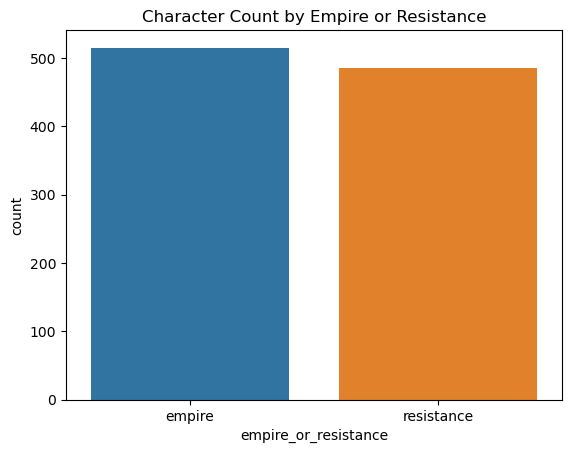

In [46]:
sns.barplot(data = er_counts, x='empire_or_resistance', y='count')
plt.title('Character Count by Empire or Resistance')

In [78]:
X = starwars_df[['homeworld', 'unit_type']]
y = starwars_df['is_resistance']
X_numeric = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=0)

In [79]:
clf = sk()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [80]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.525


In [100]:
importances = clf.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X_numeric.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

<BarContainer object of 50 artists>

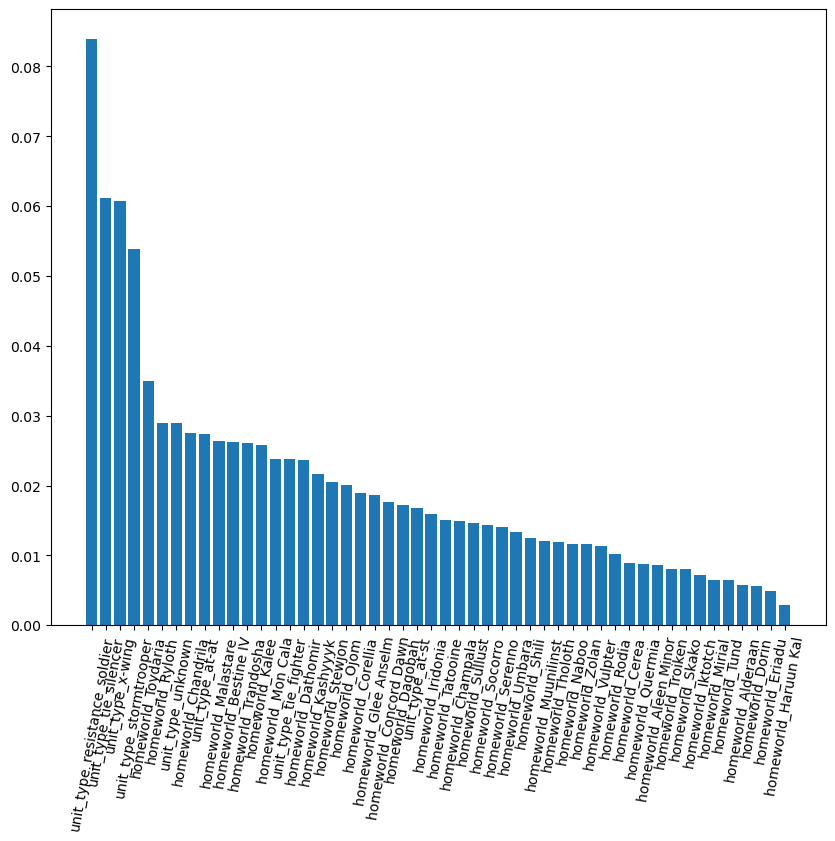

In [103]:
plt.figure(figsize=[10,8])
plt.xticks(rotation=80)
plt.bar(feature_importances['Feature'], feature_importances['Importance'])

In [106]:
pickle.dump(clf, open('trained_model.pkl', 'wb'))

In [110]:
input_file = '../troop_movements10m.csv'
real_data = pd.read_csv(input_file)
real_data.head(5),real_data.tail(5)

(             timestamp  unit_id     unit_type  location_x  location_y  \
 0  2023-06-13 17:33:18        1         at-st         2.0         8.0   
 1  2023-06-13 17:33:17        2  tie_silencer         4.0         4.0   
 2  2023-06-13 17:33:16        3         at-at         0.0         3.0   
 3  2023-06-13 17:33:15        4  tie_silencer         6.0         1.0   
 4  2023-06-13 17:33:14        5   tie_fighter         0.0         4.0   
 
    destination_x  destination_y    homeworld  
 0              1              1  Glee Anselm  
 1              0              1    Trandosha  
 2              6              1     Corellia  
 3              6              9        Shili  
 4              9              6   Muunilinst  ,
                    timestamp   unit_id           unit_type  location_x  \
 9999995  2023-02-18 10:26:20   9999996  resistance_soldier         6.0   
 9999996  2023-02-18 10:26:19   9999997        tie_silencer         8.0   
 9999997  2023-02-18 10:26:18   9999998 

In [113]:
real_data['unit_type'] = real_data['unit_type'].replace('invalid_unit', 'unknown')
real_data.head(5),real_data.tail(5)

(             timestamp  unit_id     unit_type  location_x  location_y  \
 0  2023-06-13 17:33:18        1         at-st         2.0         8.0   
 1  2023-06-13 17:33:17        2  tie_silencer         4.0         4.0   
 2  2023-06-13 17:33:16        3         at-at         0.0         3.0   
 3  2023-06-13 17:33:15        4  tie_silencer         6.0         1.0   
 4  2023-06-13 17:33:14        5   tie_fighter         0.0         4.0   
 
    destination_x  destination_y    homeworld  
 0              1              1  Glee Anselm  
 1              0              1    Trandosha  
 2              6              1     Corellia  
 3              6              9        Shili  
 4              9              6   Muunilinst  ,
                    timestamp   unit_id           unit_type  location_x  \
 9999995  2023-02-18 10:26:20   9999996  resistance_soldier         6.0   
 9999996  2023-02-18 10:26:19   9999997        tie_silencer         8.0   
 9999997  2023-02-18 10:26:18   9999998 

In [117]:
real_data['location_x'].fillna(real_data.location_x.mean(), inplace = True)
real_data['location_x'].head(5),real_data['location_x'].tail(5)

(0    2.0
 1    4.0
 2    0.0
 3    6.0
 4    0.0
 Name: location_x, dtype: float64,
 9999995    6.000000
 9999996    8.000000
 9999997    7.000000
 9999998    6.000000
 9999999    4.499686
 Name: location_x, dtype: float64)

In [118]:
real_data['location_y'].fillna(real_data.location_y.mean(), inplace = True)
real_data['location_y'].head(5),real_data['location_y'].tail(5)

(0    8.0
 1    4.0
 2    3.0
 3    1.0
 4    4.0
 Name: location_y, dtype: float64,
 9999995    6.000000
 9999996    6.000000
 9999997    7.000000
 9999998    6.000000
 9999999    4.500165
 Name: location_y, dtype: float64)

In [127]:
table = pa.Table.from_pandas(real_data)
pq.write_table(table, 'troop_movements10m.parquet')

In [128]:
data = pd.read_parquet('troop_movements10m.parquet')
data['is_resistance']
data.head(5), data.tail(5)

(             timestamp  unit_id     unit_type  location_x  location_y  \
 0  2023-06-13 17:33:18        1         at-st         2.0         8.0   
 1  2023-06-13 17:33:17        2  tie_silencer         4.0         4.0   
 2  2023-06-13 17:33:16        3         at-at         0.0         3.0   
 3  2023-06-13 17:33:15        4  tie_silencer         6.0         1.0   
 4  2023-06-13 17:33:14        5   tie_fighter         0.0         4.0   
 
    destination_x  destination_y    homeworld  
 0              1              1  Glee Anselm  
 1              0              1    Trandosha  
 2              6              1     Corellia  
 3              6              9        Shili  
 4              9              6   Muunilinst  ,
                    timestamp   unit_id           unit_type  location_x  \
 9999995  2023-02-18 10:26:20   9999996  resistance_soldier    6.000000   
 9999996  2023-02-18 10:26:19   9999997        tie_silencer    8.000000   
 9999997  2023-02-18 10:26:18   9999998 

In [139]:
loaded_model = pickle.load(open('trained_model.pkl', 'rb'))
numeric_data = pd.get_dummies(data[['homeworld', 'unit_type']])
y_pred = loaded_model.predict(numeric_data)


In [140]:
y_pred
metrics.accuracy_score(y_)

array([ True, False, False, ..., False, False,  True])

In [144]:
data['predictions'] = y_pred
data

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld,predictions
0,2023-06-13 17:33:18,1,at-st,2.000000,8.000000,1,1,Glee Anselm,True
1,2023-06-13 17:33:17,2,tie_silencer,4.000000,4.000000,0,1,Trandosha,False
2,2023-06-13 17:33:16,3,at-at,0.000000,3.000000,6,1,Corellia,False
3,2023-06-13 17:33:15,4,tie_silencer,6.000000,1.000000,6,9,Shili,False
4,2023-06-13 17:33:14,5,tie_fighter,0.000000,4.000000,9,6,Muunilinst,False
...,...,...,...,...,...,...,...,...,...
9999995,2023-02-18 10:26:20,9999996,resistance_soldier,6.000000,6.000000,1,3,Troiken,False
9999996,2023-02-18 10:26:19,9999997,tie_silencer,8.000000,6.000000,2,0,Kashyyyk,False
9999997,2023-02-18 10:26:18,9999998,tie_fighter,7.000000,7.000000,6,4,Kashyyyk,False
9999998,2023-02-18 10:26:17,9999999,tie_fighter,6.000000,6.000000,8,8,Kalee,False
